In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style 
style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score

In [2]:
df=pd.read_csv('Train.csv')

In [3]:
df.shape

(8523, 12)

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3984,FDT38,18.70,Low Fat,0.057772,Dairy,85.3566,OUT018,2009,Medium,Tier 3,Supermarket Type2,591.8962
4499,DRM59,5.88,Low Fat,0.003599,Hard Drinks,152.2998,OUT045,2002,NaN,Tier 2,Supermarket Type1,3075.9960
4227,FDE46,18.60,Low Fat,0.015757,Snack Foods,153.1366,OUT013,1987,High,Tier 3,Supermarket Type1,3173.8686
1882,FDP25,15.20,Low Fat,0.021251,Canned,216.5824,OUT045,2002,NaN,Tier 2,Supermarket Type1,5241.1776
6298,FDW09,13.65,Regular,0.025961,Snack Foods,80.4302,OUT049,1999,Medium,Tier 1,Supermarket Type1,316.9208


In [6]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

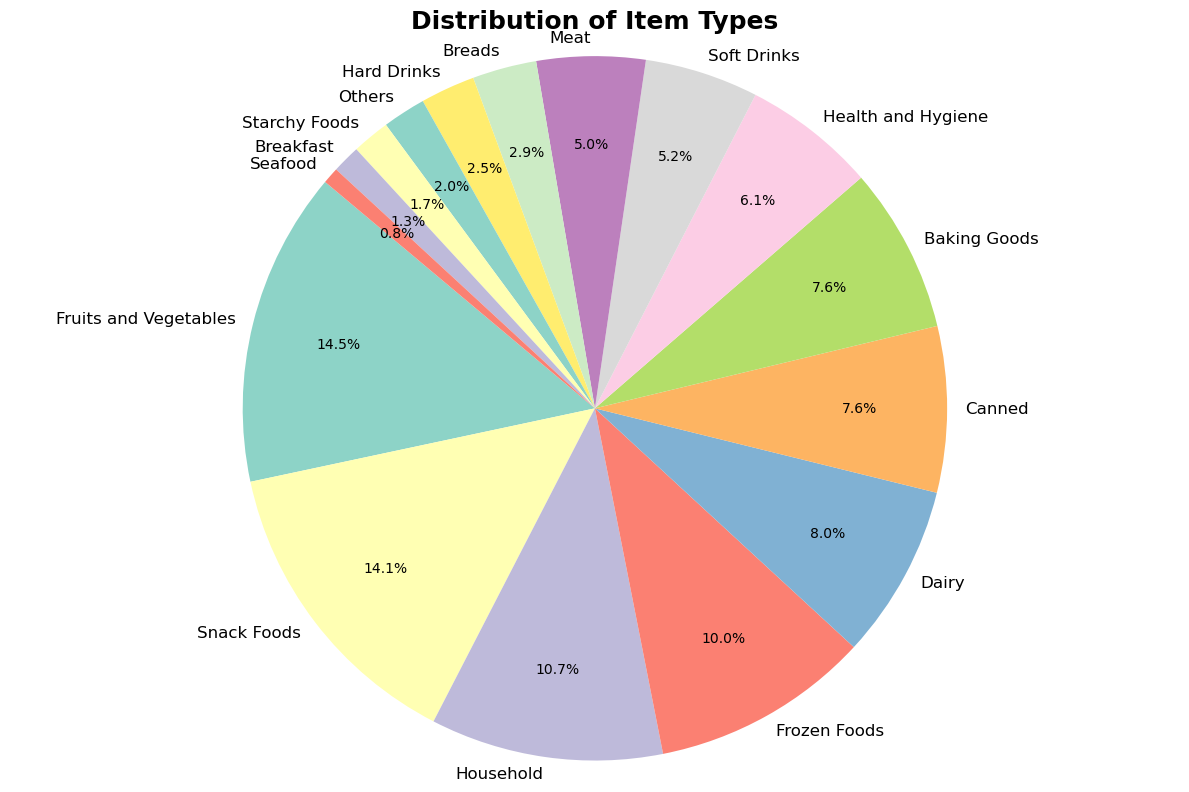

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of each Item_Type
item_type_counts = df['Item_Type'].value_counts()

# Create a colorful pie chart
plt.figure(figsize=(12, 8))
colors = plt.cm.Set3.colors  # Nice pastel colors, easier on the eyes

# Plot pie chart
wedges, texts, autotexts = plt.pie(
    item_type_counts,
    labels=item_type_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12},
    pctdistance=0.75,  # Moves percentage labels slightly inside
    labeldistance=1.05  # Moves category labels slightly outside
)

# Style tweaks
for text in texts:
    text.set_fontsize(12)
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('Black')  # White text inside slices
    autotext.set_fontsize(10)

plt.title('Distribution of Item Types', fontsize=18, fontweight='bold')
plt.axis('equal')  # Perfect circle
plt.tight_layout()
plt.savefig('graph.png')

In [8]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [9]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
categorical_values=df.select_dtypes(include=[object])
print('Count of categorical features in the dataset:',categorical_values.shape[1])

numerical_values=df.select_dtypes(include=[np.float64,np.int64])
print('Count of Numerical features in the dataset: ',numerical_values.shape[1])

Count of categorical features in the dataset: 7
Count of Numerical features in the dataset:  5


In [12]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


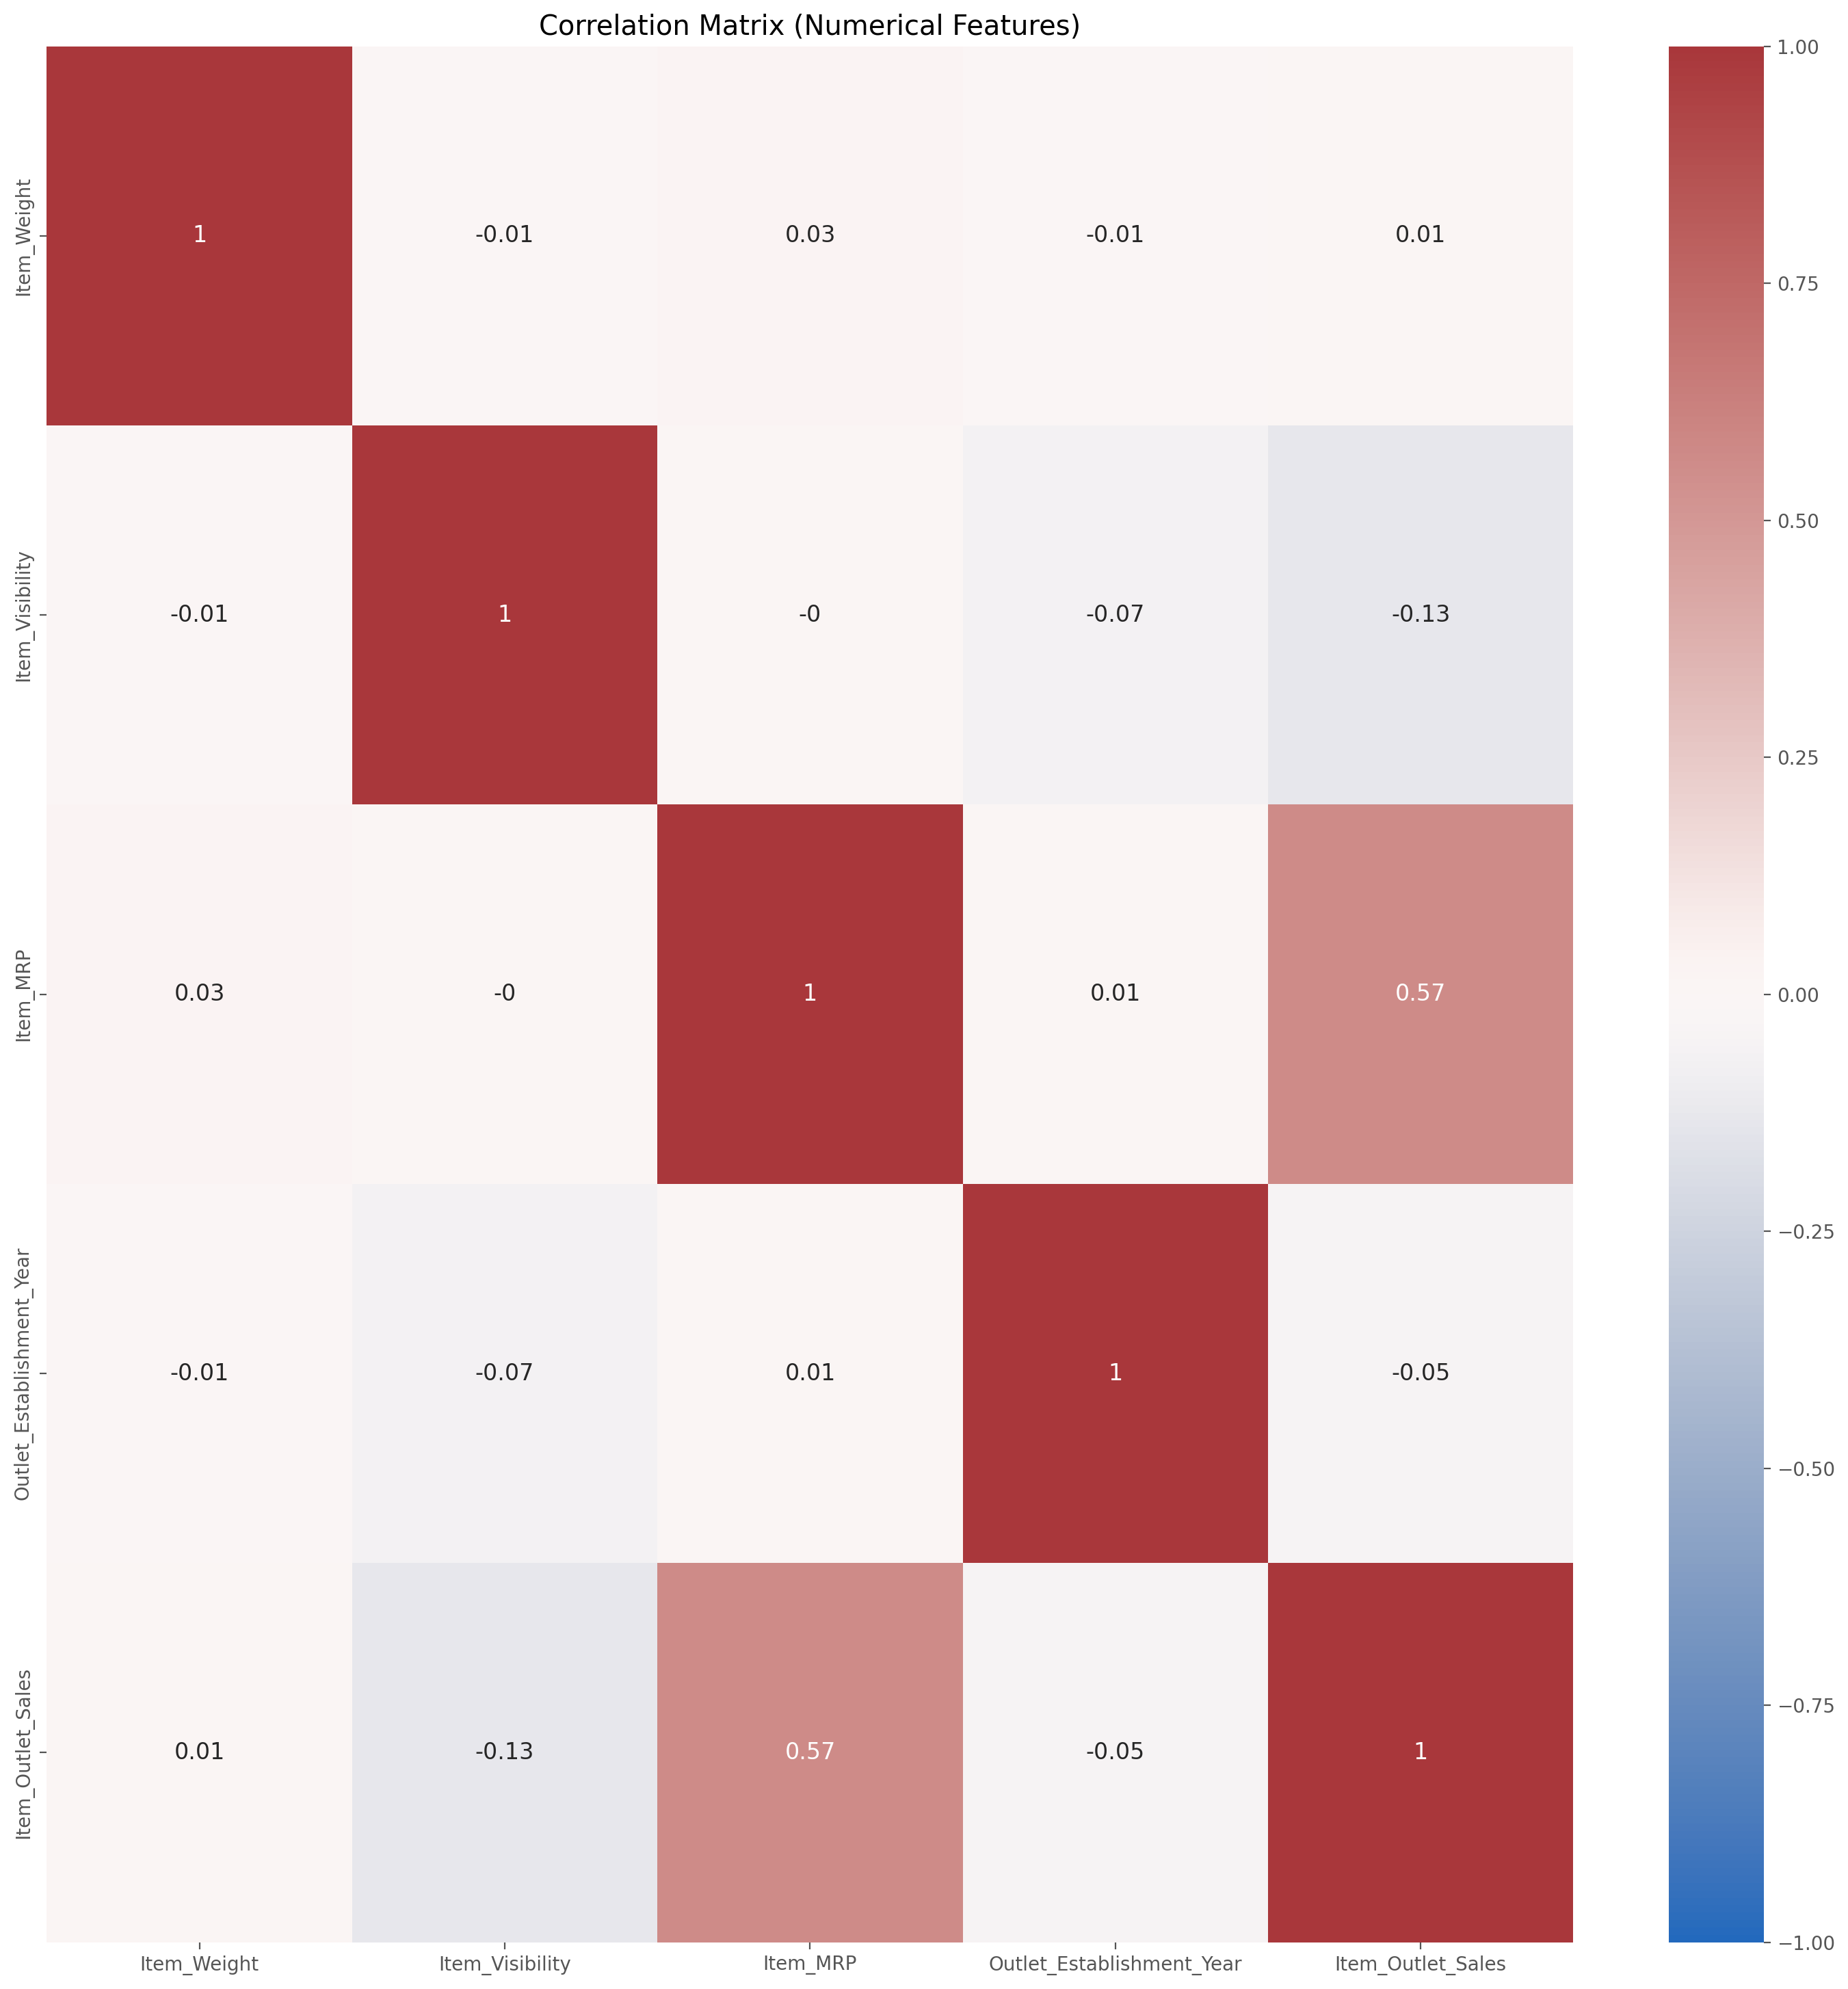

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Only select numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr().round(2)

# Plotting
plt.figure(figsize=(18, 18),dpi=200)
sns.heatmap(corr_matrix, annot=True, vmin=-1,vmax=1,center=0,cmap='vlag',annot_kws={"size": 12})
plt.title('Correlation Matrix (Numerical Features)')
plt.savefig('graph2.png')

In [14]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Axes: xlabel='Item_Weight'>

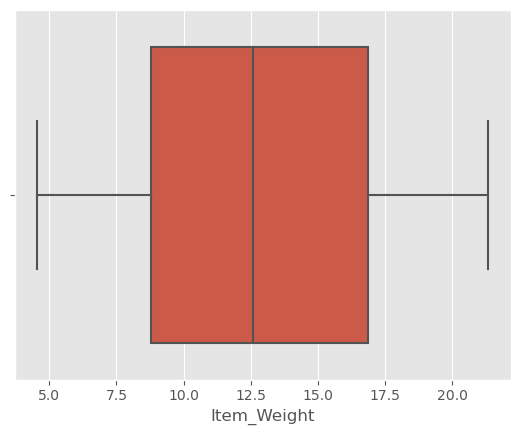

In [15]:
sns.boxplot(x=df['Item_Weight'])

In [16]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight']).mean()

<Axes: xlabel='Outlet_Size', ylabel='count'>

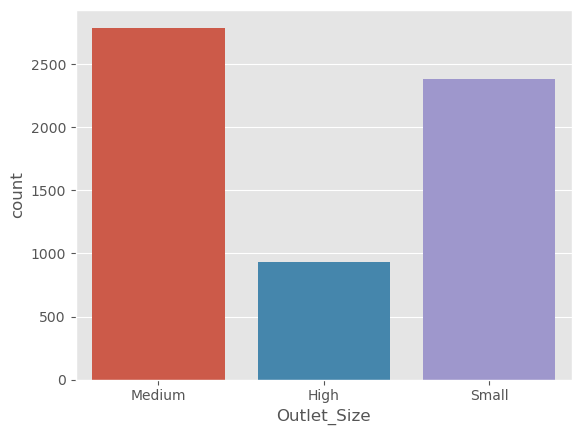

In [17]:
sns.countplot(x=df['Outlet_Size'],data=df)

In [18]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [19]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [21]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [22]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

<Axes: xlabel='Item_Outlet_Sales'>

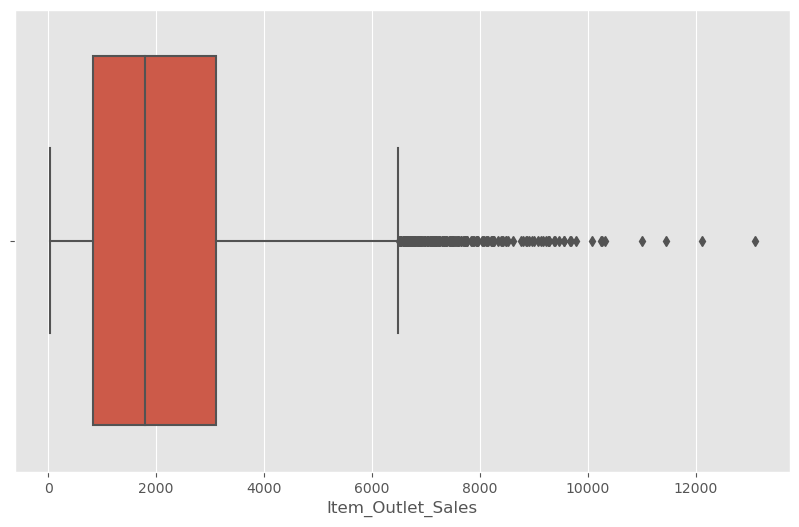

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Item_Outlet_Sales")

<Axes: xlabel='Item_Outlet_Sales'>

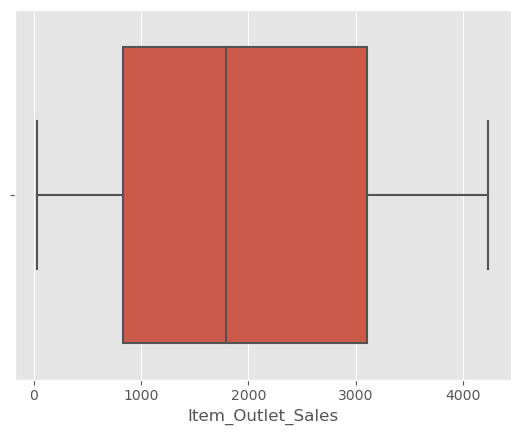

In [24]:
q1 = df["Item_Outlet_Sales"].quantile(0.25)
q3 = df["Item_Outlet_Sales"].quantile(0.75)

iqr =q3 -q1 

Maximum = q3 + (0.5*iqr)
Minimum = q1 - (0.5*iqr)

df["Item_Outlet_Sales"]=df["Item_Outlet_Sales"].clip(lower=Minimum , upper=Maximum)
sns.boxplot(data=df , x="Item_Outlet_Sales")

In [25]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [26]:
df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

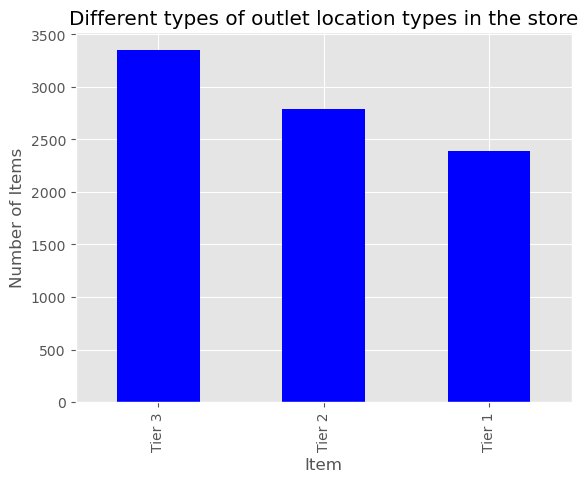

In [27]:
df['Outlet_Location_Type'].value_counts(normalize = True)
df['Outlet_Location_Type'].value_counts().plot.bar(color='Blue')
plt.title('Different types of outlet location types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [28]:
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [29]:
df1 = df.drop(['Item_Identifier','Item_Visibility','Item_Type','Outlet_Establishment_Year','Outlet_Identifier'],axis=1)
df1.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,12.857645,Low Fat,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,12.857645,Regular,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,12.857645,Low Fat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,12.857645,Regular,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,12.857645,Low Fat,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [30]:
df1['Outlet_Type'].nunique()

4

In [31]:
X=df1.drop(columns='Item_Outlet_Sales',axis=1)
Y=df1['Item_Outlet_Sales'] 
print('X-->',X.shape)
print("Y-->",Y.shape)

X--> (8523, 6)
Y--> (8523,)


In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [33]:
print('X_train: ',x_train.shape)
print('X_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (6818, 6)
X_test:  (1705, 6)
y_train:  (6818,)
y_test:  (1705,)


In [34]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [35]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',StandardScaler(),['Item_Weight','Item_MRP']),
    ('tnf2',OneHotEncoder(drop='first'),['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
],remainder='passthrough') 

In [36]:
X_train=transformer.fit_transform(x_train)
X_train.shape

(6818, 10)

In [37]:
X_test=transformer.fit_transform(x_test)
X_test.shape

(1705, 10)

# Linear Regression

In [39]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)
linreg_pred=linreg.predict(X_test)

In [40]:
linreg_mae=mean_absolute_error(y_test,linreg_pred)
linreg_r2=r2_score(y_test,linreg_pred)
print('MAE of the linear regression model is: ',linreg_mae)
print('R2 score of the linear regression model is: ',linreg_r2)

MAE of the linear regression model is:  659.3716505592711
R2 score of the linear regression model is:  0.6159552475444344


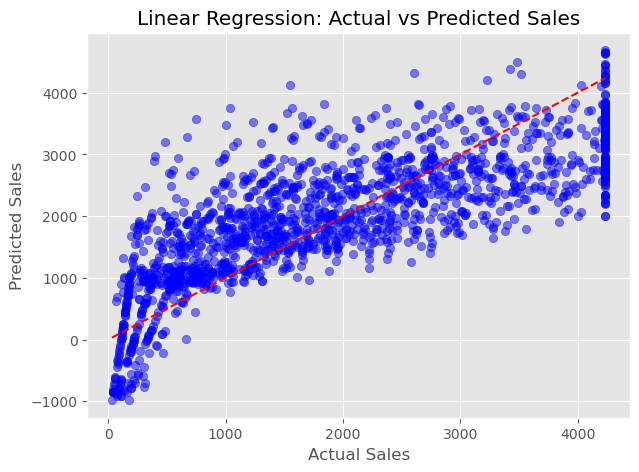

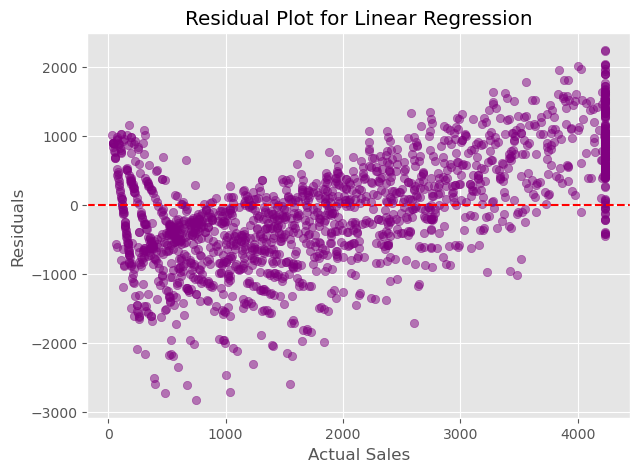

In [41]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(7, 5))
plt.scatter(y_test, linreg_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs Predicted Sales")
plt.grid(True)
plt.tight_layout()
plt.savefig('graph1.png')

# Residual Plot
residuals = y_test - linreg_pred
plt.figure(figsize=(7, 5))
plt.scatter(y_test, residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel("Actual Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression")
plt.grid(True)
plt.show()


# Random Forest

In [43]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

In [44]:
rf_mae=mean_absolute_error(y_test,rf_pred)
rf_r2=r2_score(y_test,rf_pred)
print('MAE of the Random Forest model is: ',rf_mae)
print('R2 score of the Random Forest model is: ',rf_r2)

MAE of the Random Forest model is:  677.8582561266375
R2 score of the Random Forest model is:  0.5196973331914058


In [45]:
import optuna

In [46]:
from sklearn.model_selection import cross_val_score

In [144]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


 

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_float('max_features', 0.3, 1.0, step=0.1),
    }

    model = RandomForestRegressor(**params, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return r2_score(y_test, preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best R² score:", study.best_value)
print("Best hyperparameters:", study.best_params)

[I 2025-04-29 16:43:50,344] A new study created in memory with name: no-name-a40fab1a-ee6b-4626-82d2-8d9df48c9b88
[I 2025-04-29 16:43:51,429] Trial 0 finished with value: 0.5798037871976134 and parameters: {'n_estimators': 189, 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 0.6000000000000001}. Best is trial 0 with value: 0.5798037871976134.
[I 2025-04-29 16:43:52,025] Trial 1 finished with value: 0.6053168365909575 and parameters: {'n_estimators': 138, 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 0.5}. Best is trial 1 with value: 0.6053168365909575.
[I 2025-04-29 16:43:53,849] Trial 2 finished with value: 0.6103760767558308 and parameters: {'n_estimators': 333, 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 0.9000000000000001}. Best is trial 2 with value: 0.6103760767558308.
[I 2025-04-29 16:43:54,941] Trial 3 finished with value: 0.5076439999888919 and parameters: {'n_estimators': 3

Best R² score: 0.6516356443598865
Best hyperparameters: {'n_estimators': 360, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 1.0}


In [146]:
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_slice, plot_param_importances

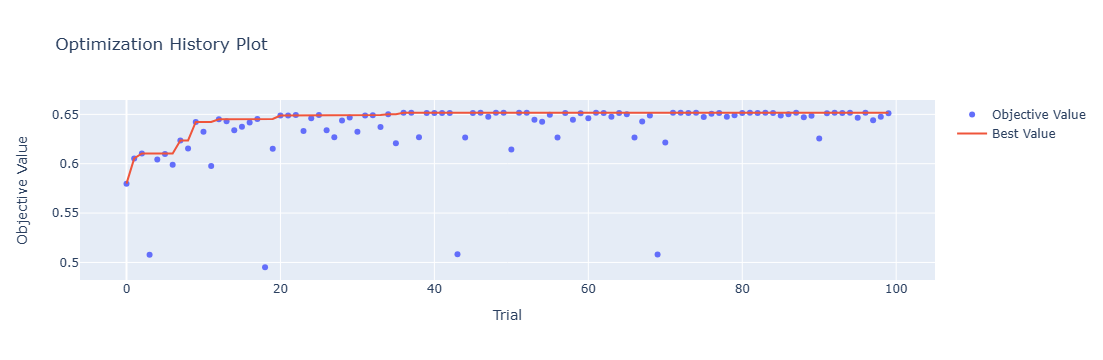

In [148]:
# 1. Optimization History
plot_optimization_history(study).show()

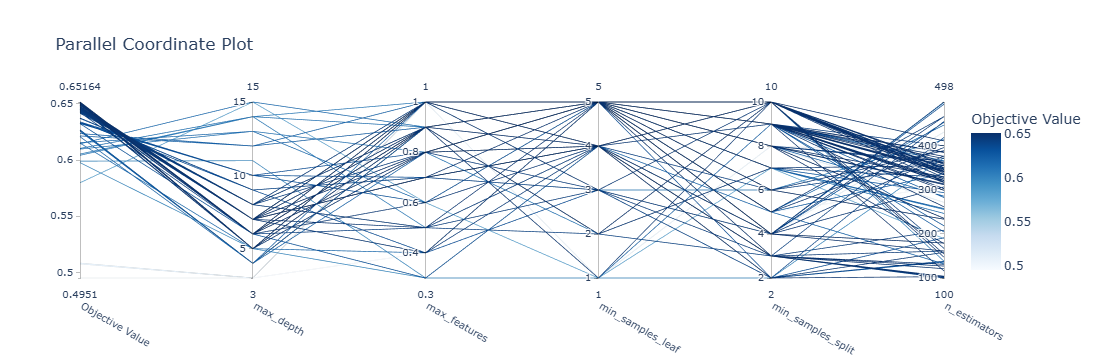

In [150]:
# 2. Parallel Coordinates Plot
plot_parallel_coordinate(study).show()

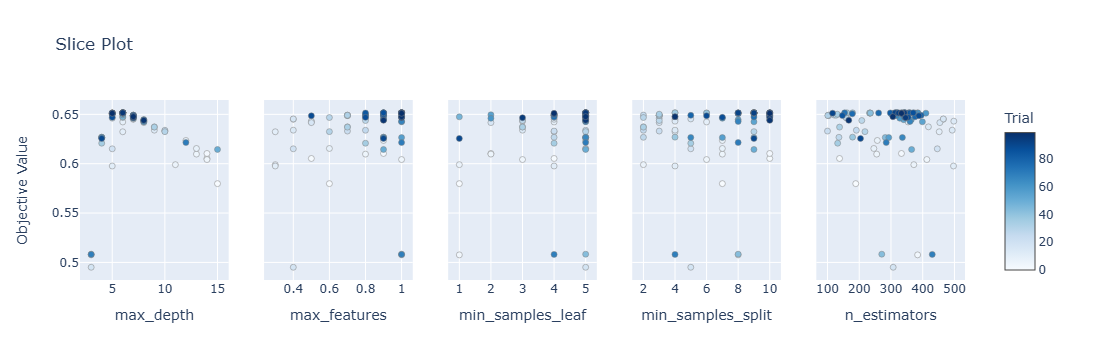

In [152]:
# 3. Slice Plot
plot_slice(study).show()

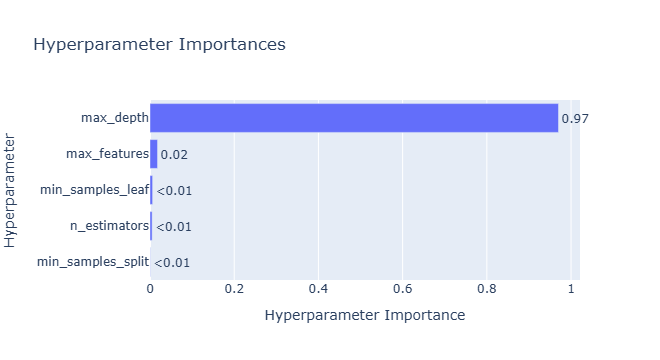

In [154]:
# 5. Hyperparameter Importance
plot_param_importances(study).show()

In [156]:
rf=RandomForestRegressor(**study.best_trial.params, random_state=42)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_mae=mean_absolute_error(y_test,rf_pred)
rf_r2=r2_score(y_test,rf_pred)
print('MAE of the Random Forest model is: ',rf_mae)
print('R2 score of the Random Forest model is: ',rf_r2)

MAE of the Random Forest model is:  591.8315590918813
R2 score of the Random Forest model is:  0.6516356443598865


# xgboost

In [55]:
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)

In [56]:
xgb_mae=mean_absolute_error(y_test,xgb_pred)
xgb_r2=r2_score(y_test,xgb_pred)
print('MAE of the XGBoost model is: ',xgb_mae)
print('R2 score of the XGBoost model is: ',xgb_r2)

MAE of the XGBoost model is:  637.7647508672715
R2 score of the XGBoost model is:  0.5861617711976694


In [158]:
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

 

def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
    }

    model = xgb.XGBRegressor(**params, verbosity=0)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    preds = model.predict(X_test)
    return r2_score(y_test, preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best R² score:", study.best_value)
print("Best hyperparameters:", study.best_params)

[I 2025-04-29 16:46:12,940] A new study created in memory with name: no-name-a9f22829-8a3f-4b3a-a71b-cba962380c53
[I 2025-04-29 16:46:13,505] Trial 0 finished with value: 0.5052739382726037 and parameters: {'max_depth': 9, 'learning_rate': 0.1792484159467551, 'n_estimators': 170, 'subsample': 0.8655874359141933, 'colsample_bytree': 0.957061157804421}. Best is trial 0 with value: 0.5052739382726037.
[I 2025-04-29 16:46:13,927] Trial 1 finished with value: 0.5932823198963735 and parameters: {'max_depth': 8, 'learning_rate': 0.07403215023337607, 'n_estimators': 235, 'subsample': 0.7170519436115663, 'colsample_bytree': 0.6047376256972997}. Best is trial 1 with value: 0.5932823198963735.
[I 2025-04-29 16:46:14,407] Trial 2 finished with value: 0.46857661694163044 and parameters: {'max_depth': 10, 'learning_rate': 0.28358795068783843, 'n_estimators': 136, 'subsample': 0.8866787070069493, 'colsample_bytree': 0.9536296119824444}. Best is trial 1 with value: 0.5932823198963735.
[I 2025-04-29 16

Best R² score: 0.6474912822631343
Best hyperparameters: {'max_depth': 3, 'learning_rate': 0.0288450688785577, 'n_estimators': 301, 'subsample': 0.6333000402691087, 'colsample_bytree': 0.8006958176326409}


In [160]:
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_slice, plot_param_importances

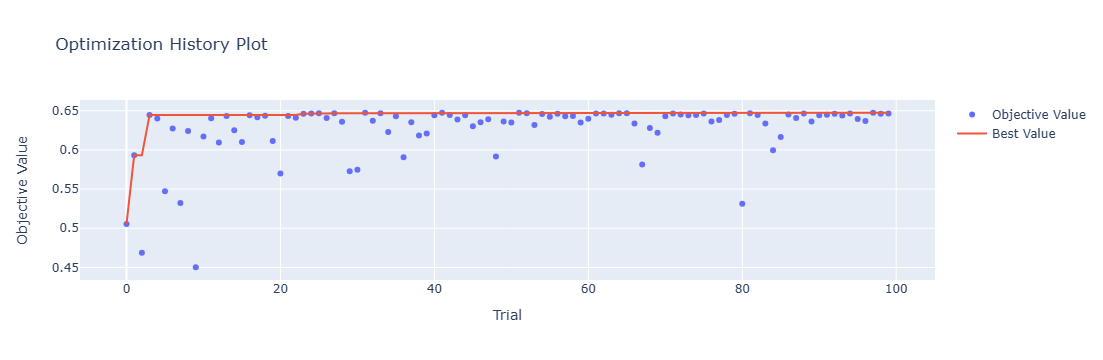

In [162]:
# 1. Optimization History
plot_optimization_history(study).show()

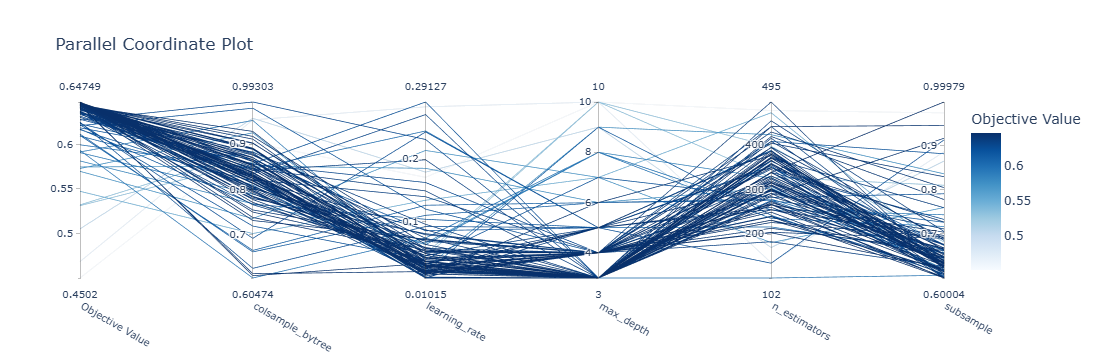

In [164]:
# 2. Parallel Coordinates Plot
plot_parallel_coordinate(study).show()

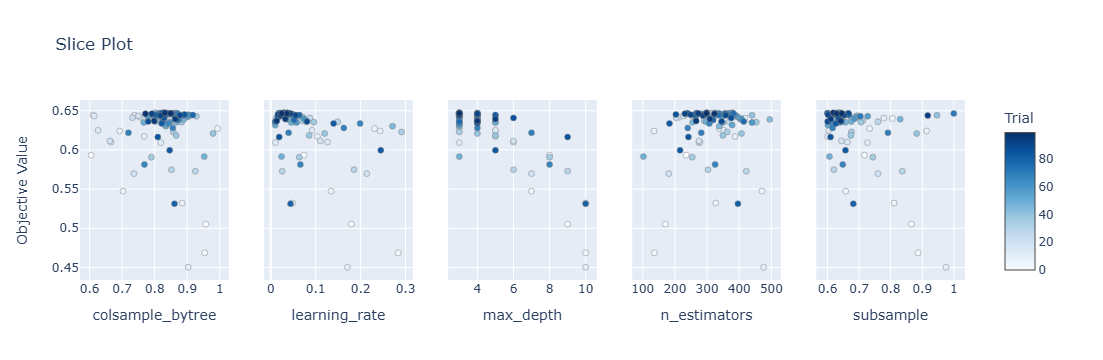

In [166]:
# 3. Slice Plot
plot_slice(study).show()

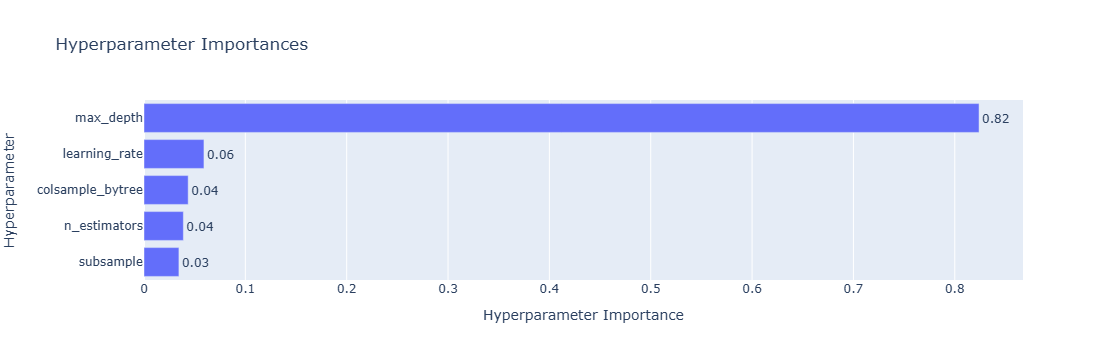

In [168]:
# 5. Hyperparameter Importance
plot_param_importances(study).show()

In [170]:
xgb_model = XGBRegressor(**study.best_trial.params, random_state=42)
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
y_pred = xgb_model.predict(X_test)
print("MAE: ",mean_absolute_error(y_test, y_pred))
print('r2score: ',r2_score(y_test,y_pred))

MAE:  609.9803220395194
r2score:  0.6464231432034788


In [64]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)
linreg_pred=linreg.predict(X_test)

In [65]:
linreg_mae=mean_absolute_error(y_test,linreg_pred)
linreg_r2=r2_score(y_test,linreg_pred)
print('MAE of the linear regression model is: ',linreg_mae)
print('R2 score of the linear regression model is: ',linreg_r2)

MAE of the linear regression model is:  659.3716505592711
R2 score of the linear regression model is:  0.6159552475444344


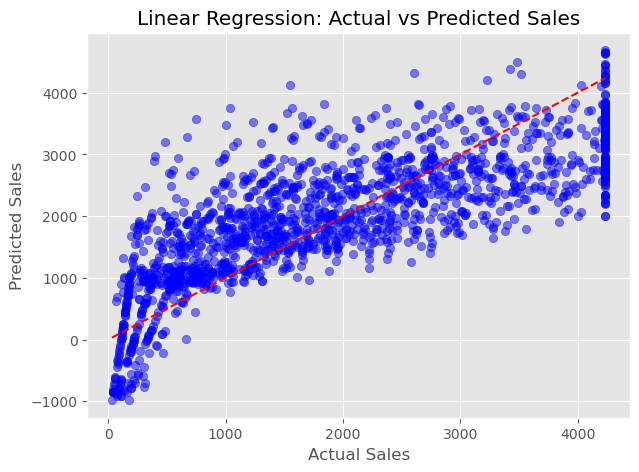

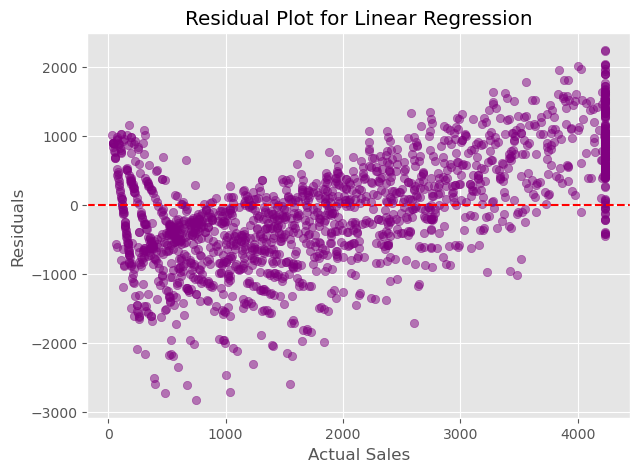

In [66]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(7, 5))
plt.scatter(y_test, linreg_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs Predicted Sales")
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_test - linreg_pred
plt.figure(figsize=(7, 5))
plt.scatter(y_test, residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel("Actual Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression")
plt.grid(True)
plt.show()


In [67]:
# GridSearchCV 
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7],
    'objective': ['reg:squarederror']
}

# Use the XGBRegressor instead of XGBClassifier
xgb_model = XGBRegressor()

# Use appropriate scoring for regression
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1,
                           verbose=1, scoring='r2')

# Fit the model
grid_search.fit(X_train, y_train)

# Output
print("Best set of hyperparameters: ", grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best set of hyperparameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'objective': 'reg:squarederror', 'subsample': 1}


In [68]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.1,
        max_depth = 3,
        subsample = 1)
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
y_pred = xgb_model.predict(X_test)
print("MAE: ",mean_absolute_error(y_test, y_pred))
print('r2score: ',r2_score(y_test,y_pred))

MAE:  626.7798141745149
r2score:  0.6389712314543337


In [69]:
# RandomSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7],
    'objective': ['reg:squarederror']
}
from sklearn.model_selection import RandomizedSearchCV
xgb_model = XGBRegressor()

rf_grid = RandomizedSearchCV(estimator = xgb_model , 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=1, 
                       n_jobs = -1)

rf_grid.fit(X_train,y_train)
rf_grid.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'subsample': 0.7,
 'objective': 'reg:squarederror',
 'max_depth': 3,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7}

# Stacking

In [198]:
from sklearn.ensemble import StackingRegressor
# Define base regressors
base_estimators = [
    ('xgb',xgb_model),
    ('rf',rf)
     
]

# Define stacking regressor
stacked_model = StackingRegressor(
    estimators=base_estimators,
    final_estimator = linreg)

# Train
stacked_model.fit(X_train, y_train)

# Predict
y_pred = stacked_model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")
print('mean absolute score',mean_absolute_error(y_test,y_pred))

R² Score: 0.6466
mean absolute score 607.5831473505391


# normal stacking

In [200]:
xgb= XGBRegressor(**study.best_trial.params, random_state=42) 
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)
xgb_mae=mean_absolute_error(y_test,xgb_pred)
xgb_r2=r2_score(y_test,xgb_pred)
print('MAE of the XGBoost model is: ',xgb_mae)
print('R2 score of the XGBoost model is: ',xgb_r2)

rf_model = RandomForestRegressor(n_estimators=100,random_state=4)
rf_model.fit(y_pred.reshape(-1, 1), y_test)
y_pred_rf = rf_model.predict(y_pred.reshape(-1, 1))
print("MAE: ",mean_absolute_error(y_test, y_pred_rf))
print('r2score: ',r2_score(y_test, y_pred_rf))

MAE of the XGBoost model is:  609.9803220395194
R2 score of the XGBoost model is:  0.6464231432034788
MAE:  270.32295670223994
r2score:  0.9184575331798877
